# GDP Analysis

This notebook contains the exploratory data analysis and visualizations of the GDP data using Pandas and Matplotlib.

In [ ]:
import seaborn as sns
custom_palette = sns.color_palette("husl", 8)
sns.set_palette(custom_palette)

In [ ]:
import plotly.express as px

def plot_interactive_gdp_trends(df, countries=None):
    if countries:
        df_filtered = df[df['Country'].isin(countries)]
    else:
        df_filtered = df
    
    fig = px.line(df_filtered, x='Year', y='GDP', color='Country',
                  title='Interactive GDP Trends Over Time')
    fig.show()

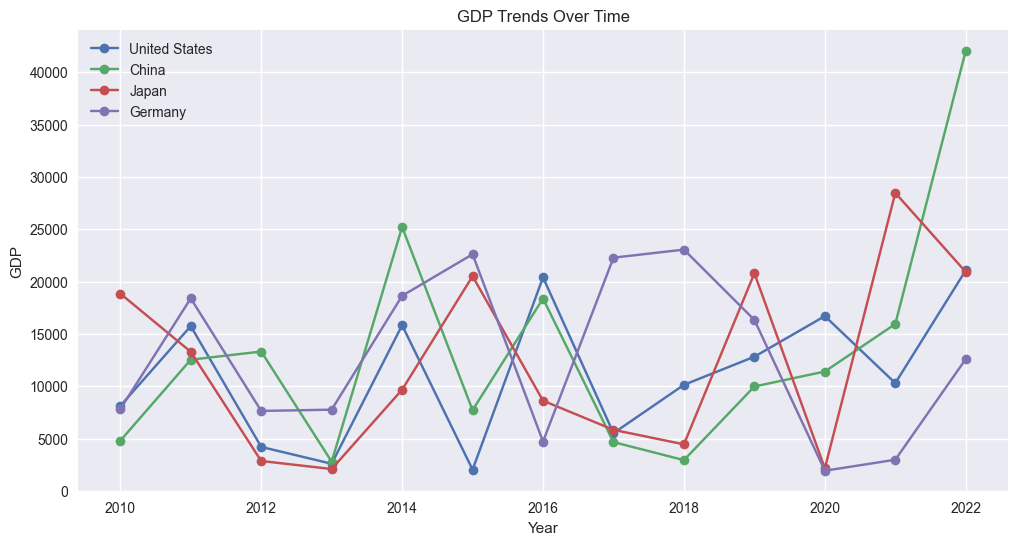

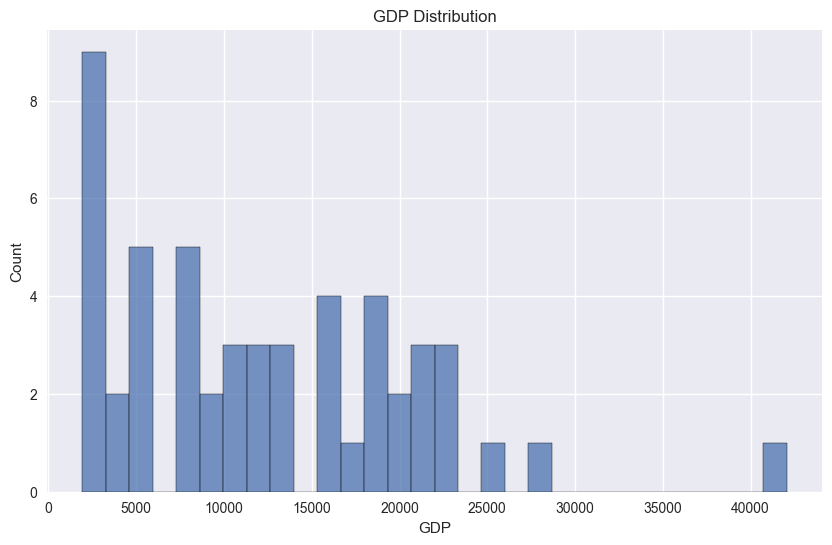

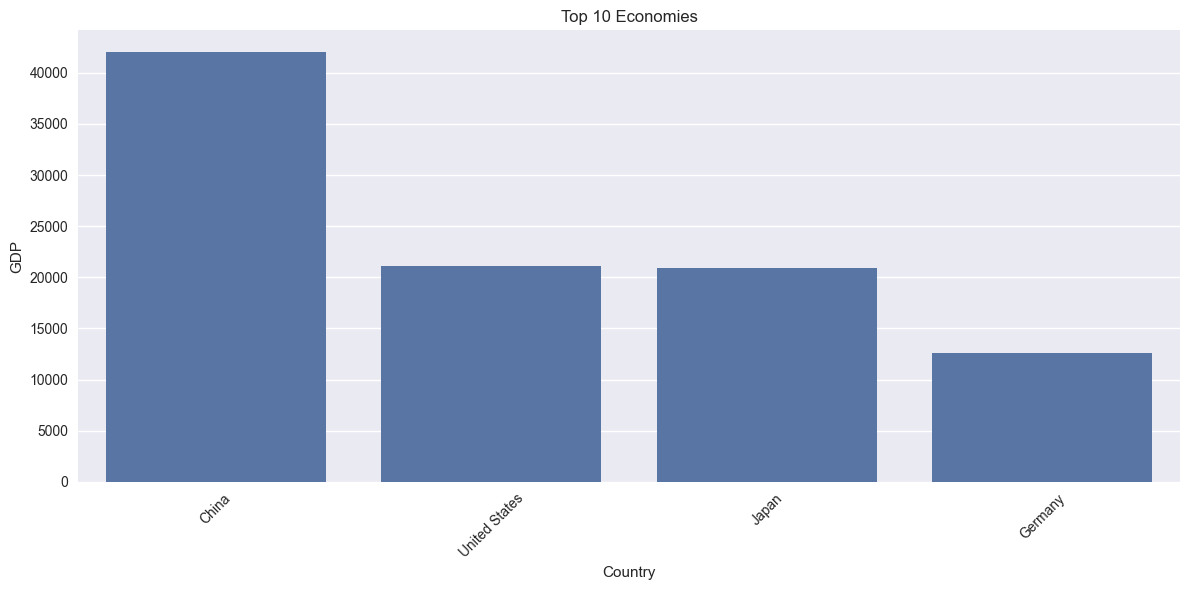

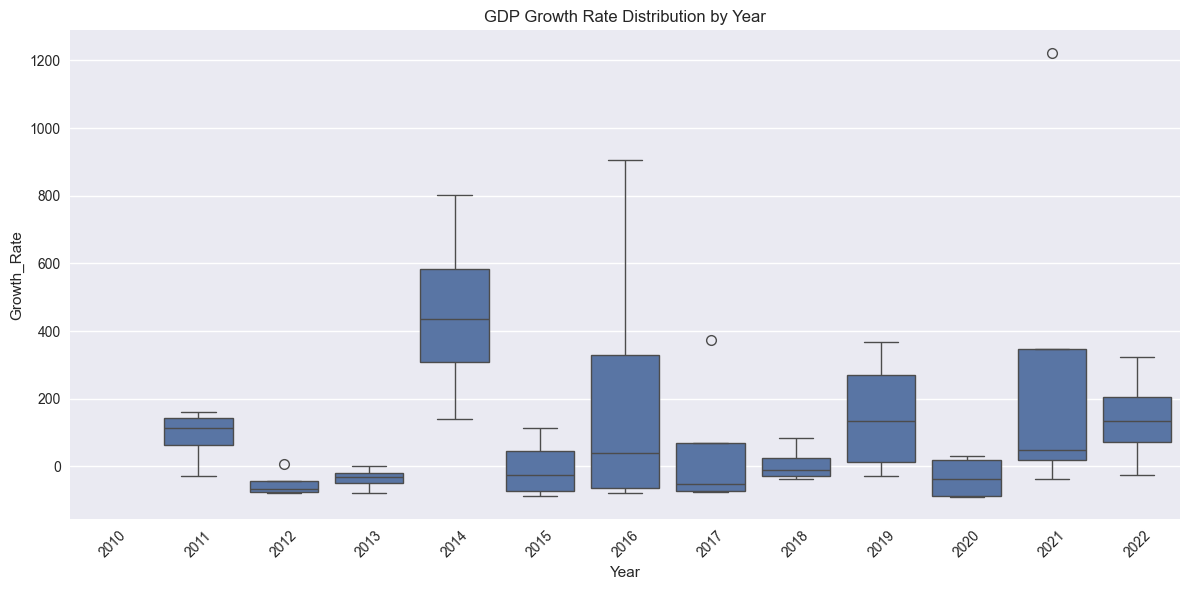

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the helper functions
def load_data(file_path, file_format):
    if file_format == 'csv':
        return pd.read_csv(file_path)
    elif file_format in ['xls', 'xlsx']:
        return pd.read_excel(file_path)
    else:
        raise ValueError("Unsupported file format. Supported formats: csv, xls, xlsx")

def clean_data(df):
    # Basic cleaning operations
    df = df.dropna()
    return df

def plot_gdp_trends(df, countries=None):
    if countries:
        df_filtered = df[df['Country'].isin(countries)]
    else:
        df_filtered = df
    
    plt.figure(figsize=(12, 6))
    for country in countries:
        country_data = df_filtered[df_filtered['Country'] == country]
        plt.plot(country_data['Year'], country_data['GDP'], label=country, marker='o')
    plt.title('GDP Trends Over Time')
    plt.xlabel('Year')
    plt.ylabel('GDP')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_gdp_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='GDP', bins=30)
    plt.title('GDP Distribution')
    plt.xlabel('GDP')
    plt.show()

def plot_top_economies(df, n=10):
    latest_year = df['Year'].max()
    top_n = df[df['Year'] == latest_year].nlargest(n, 'GDP')
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_n, x='Country', y='GDP')
    plt.title(f'Top {n} Economies')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Create sample data
#years = range(2010, 2023)
#countries = ['United States', 'China', 'Japan', 'Germany']
#data = []

# Generate sample GDP data
#np.random.seed(42)
#for country in countries:
#    for year in years:
#        base_gdp = np.random.uniform(1000, 20000)
#        growth = 1 + np.random.uniform(0.02, 0.08)  # 2-8% growth
#        gdp = base_gdp * (growth ** (year - 2010))
#        data.append({'Country': country, 'Year': year, 'GDP': gdp})

#df = pd.DataFrame(data)
#df_cleaned = clean_data(df)

# Set style for better visualizations
plt.style.use('seaborn-v0_8')  # or you can use other available styles like 'ggplot', 'classic', etc.

# Plot GDP trends for specific countries
countries_of_interest = ['United States', 'China', 'Japan', 'Germany']
plot_gdp_trends(df_cleaned, countries=countries_of_interest)

# Plot GDP distribution
plot_gdp_distribution(df_cleaned)

# Plot top 10 economies
plot_top_economies(df_cleaned, n=10)

# Additional analysis: GDP Growth Rate visualization
df_cleaned['Growth_Rate'] = df_cleaned.groupby('Country')['GDP'].pct_change() * 100

# Plot growth rates
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='Year', y='Growth_Rate')
plt.title('GDP Growth Rate Distribution by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
# Summary statistics
df.describe()

,Year,GDP
count,52.000000,52.000000
mean,2016.000000,12354.476202
std,3.778162,8422.319970
min,2010.000000,1925.784970
25%,2013.000000,4774.281701
50%,2016.000000,10851.997487
75%,2019.000000,18458.277893
max,2022.000000,42059.647011


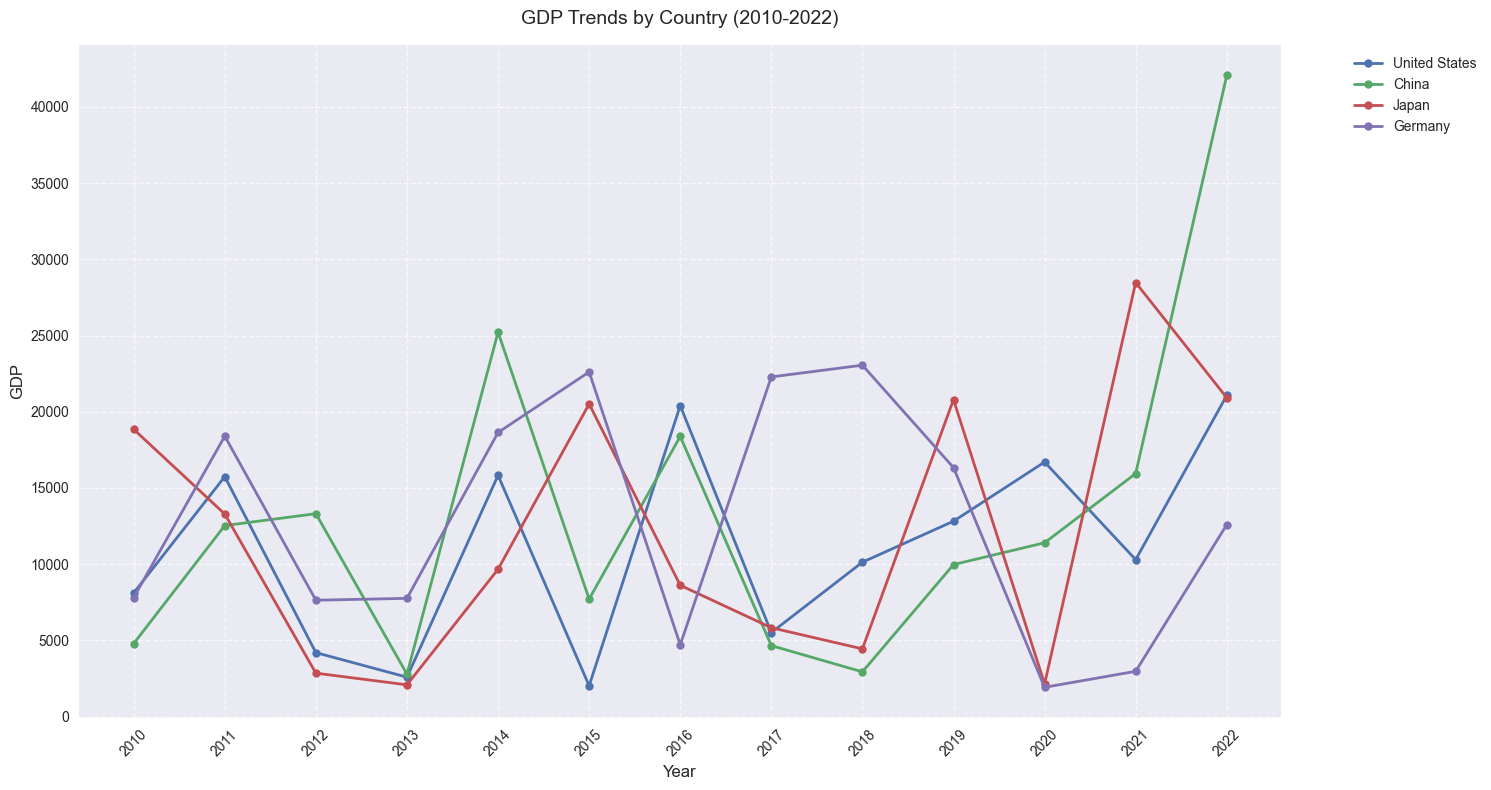

In [29]:
plt.figure(figsize=(15, 8))

for country in countries:
    country_data = df[df['Country'] == country]
    plt.plot(country_data['Year'], country_data['GDP'], 
             marker='o', 
             linewidth=2, 
             markersize=6,
             label=country)

plt.title('GDP Trends by Country (2010-2022)', fontsize=14, pad=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df['Year'].unique(), rotation=45)

# Add some padding to prevent label cutoff
plt.tight_layout()

plt.show()

In [ ]:
# Additional visualizations and analysis can be added here.